<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/Case_Study/Relevant_Job__Title_Pictures_v03_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Describe...

----------
Author: Raiana Roland Seixas
09/07/2022

# Data load & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate

In [3]:
!git clone https://github.com/RaianaSeixas/NLT
%cd NLT

fatal: destination path 'NLT' already exists and is not an empty directory.
/content/NLT


In [4]:
df=pd.read_csv('occupation_pictures.csv')
df

,Job Title,Pic Title,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Picture URL,Manual Label
0,3D Modeler,Our Top 19 3D Modeling Software Picks ...,1261,0,0,7,276.763672,1917,2301,4411017,2,https://format-magazine-production-res.cloudin...,NaN
1,3D Modeler,7 Tips for Beginner 3D Modelers ...,1261,1,0,3,44.343750,340,747,253980,5,http://static1.squarespace.com/static/5320f582...,NaN
2,3D Modeler,How to Become an Expert 3D Modeler ...,1261,2,0,2,43.088867,380,660,250800,8,https://www.gamedesigning.org/wp-content/uploa...,NaN
3,3D Modeler,What is 3D Modeling & What's It Used For?,1261,3,0,2,78.623047,330,750,247500,1,https://cdn.conceptartempire.com/images/04/522...,NaN
4,3D Modeler,Shoofping 3D Modeler ...,1261,4,0,1,97.517578,1075,1909,2052175,3,http://shoofping.com/wp-content/uploads/2017/1...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,Wind Turbine Engineer,Wind turbine technician fastest-growing ...,61,4,0,0,89.249023,720,1280,921600,0,https://i.ytimg.com/vi/lUf2mOYp1d4/maxresdefau...,good
654,Wind Turbine Engineer,How to Become a Wind Energy Engineer ...,61,5,0,0,37.949219,200,300,60000,0,https://www.environmentalscience.org/wp-conten...,NaN
655,Wind Turbine Engineer,Wind - Get Into Energy,61,6,0,1,324.730469,500,750,375000,1,http://getintoenergy.com/wp-content/uploads/20...,good
656,Wind Turbine Engineer,Wind-energy programs yield engineering ...,61,7,0,1,36.197266,920,613,563960,0,https://s.hdnux.com/photos/20/15/22/4248747/3/...,good


In [5]:
data=df.drop(columns=['Picture URL'])

In [6]:
data['Manual Label'].describe()

count      133
unique       2
top       good
freq        91
Name: Manual Label, dtype: object

In [7]:
data['Pic Title'].describe()

count                            658
unique                           593
top       Bureau of Labor Statistics
freq                              17
Name: Pic Title, dtype: object

# Exploratory Analysis

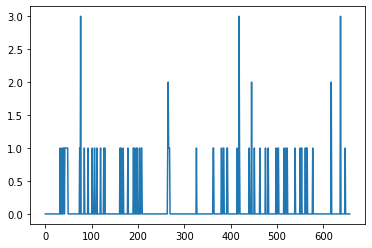

In [8]:
plt.plot(data['Strict Face Count'])

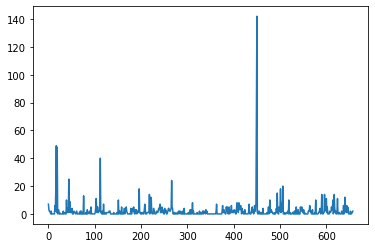

In [9]:
plt.plot(data['Relaxed Face Count'])

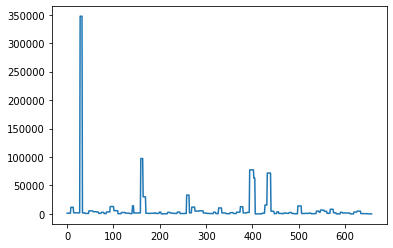

In [10]:
plt.plot(data['Num Resumes'])

# Data Preprocessing

In [11]:
import nltk
ps = nltk.PorterStemmer()
wn=nltk.WordNetLemmatizer()
nltk.download("popular")
stopwords = nltk.corpus.stopwords.words('english')
import re
import string

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

### Clean up text

In [12]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data['Job Title'] = data['Job Title'].apply(lambda x: clean_text(x.lower()))
data['Pic Title'] = data['Pic Title'].apply(lambda x: clean_text(x.lower()))
data.head()

,Job Title,Pic Title,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Manual Label
0,"[3d, modeler]","[top, 19, 3d, modeling, software, picks, ]",1261,0,0,7,276.763672,1917,2301,4411017,2,NaN
1,"[3d, modeler]","[7, tips, beginner, 3d, modelers, ]",1261,1,0,3,44.343750,340,747,253980,5,NaN
2,"[3d, modeler]","[become, expert, 3d, modeler, ]",1261,2,0,2,43.088867,380,660,250800,8,NaN
3,"[3d, modeler]","[3d, modeling, whats, used]",1261,3,0,2,78.623047,330,750,247500,1,NaN
4,"[3d, modeler]","[shoofping, 3d, modeler, ]",1261,4,0,1,97.517578,1075,1909,2052175,3,NaN


### Stem / Lemmatize text

In [13]:
def stemming(text):
  stemmed=[ps.stem(word) for word in text]
  return stemmed

data['Stem Job Title'] = data['Job Title'].apply(lambda x: stemming(x))
data['Stem Pic Title'] = data['Pic Title'].apply(lambda x: stemming(x))
data.head()

,Job Title,Pic Title,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Manual Label,Stem Job Title,Stem Pic Title
0,"[3d, modeler]","[top, 19, 3d, modeling, software, picks, ]",1261,0,0,7,276.763672,1917,2301,4411017,2,NaN,"[3d, model]","[top, 19, 3d, model, softwar, pick, ]"
1,"[3d, modeler]","[7, tips, beginner, 3d, modelers, ]",1261,1,0,3,44.343750,340,747,253980,5,NaN,"[3d, model]","[7, tip, beginn, 3d, model, ]"
2,"[3d, modeler]","[become, expert, 3d, modeler, ]",1261,2,0,2,43.088867,380,660,250800,8,NaN,"[3d, model]","[becom, expert, 3d, model, ]"
3,"[3d, modeler]","[3d, modeling, whats, used]",1261,3,0,2,78.623047,330,750,247500,1,NaN,"[3d, model]","[3d, model, what, use]"
4,"[3d, modeler]","[shoofping, 3d, modeler, ]",1261,4,0,1,97.517578,1075,1909,2052175,3,NaN,"[3d, model]","[shoofp, 3d, model, ]"


In [14]:
'''def lemmatized(text):
  lemmatized= [wn.lemmatize(word) for word in text]
  return lemmatized

data['Lemma Job Title'] = data['Job Title'].apply(lambda x: lemmatized(x))
data['Lemma Pic Title'] = data['Pic Title'].apply(lambda x: lemmatized(x))
data'''

"def lemmatized(text):\n  lemmatized= [wn.lemmatize(word) for word in text]\n  return lemmatized\n\ndata['Lemma Job Title'] = data['Job Title'].apply(lambda x: lemmatized(x))\ndata['Lemma Pic Title'] = data['Pic Title'].apply(lambda x: lemmatized(x))\ndata"

###Data split

In [15]:
data=data.drop(columns=['Job Title','Pic Title'])

In [16]:
''' Data (with labels) to test the model '''

labaled= data[data['Manual Label'].notna()]
labaled.head()

,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Manual Label,Stem Job Title,Stem Pic Title
21,1824,1,0,2,529.085938,1382,2200,3040400,2,good,"[architectur, drafter]","[9, firm, offer, architectur, ]"
24,1824,4,0,1,28.923828,446,600,267600,0,good,"[architectur, drafter]","[2017, architectur, drafter, careercastcom]"
29,347272,2,0,0,56.383789,640,1280,819200,1,bad,[assist],"[googl, assist, 20, chang, ]"
32,347272,7,1,2,390.638672,844,1243,1049092,0,good,[assist],"[person, assist, app, ]"
39,868,0,1,10,640.045898,1500,2000,3000000,0,good,"[assist, curat]","[assist, curat, ancient, ]"


In [17]:
#Drop target feature
X = labaled.drop(columns=['Manual Label','Stem Job Title','Stem Pic Title']) 
# encoded categorial features
y = labaled['Manual Label'].replace({'good':0, 'bad':1})
print('Feature matrix size:',X.shape)
print('Target vector size:',len(y))

Feature matrix size: (133, 9)
Target vector size: 133


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2, stratify=y)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (106, 9)
Training target vector size: (106,)
Test feature matrix size: (27, 9)
Test target vector size: (27,)


In [19]:
# converting to number columns 
# this step should be done but we will 
# delete the text columns as sharing task aggrement
# if you have problem in this task we can work on it tomorrow...


# Predictive Model

In [20]:
X_train

,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions
442,4701,3,0,3,80.270508,720,1280,921600,0
308,641,0,0,3,648.829102,1080,1920,2073600,0
516,968,2,0,1,99.722656,671,1100,738100,3
463,840,8,1,4,56.970703,533,800,426400,0
565,993,6,1,4,1307.146484,2409,3623,8727807,2
...,...,...,...,...,...,...,...,...,...
647,498,7,1,3,1006.559570,1031,1743,1797033,1
49,5358,2,0,1,30.211914,350,613,214550,0
424,1347,4,0,3,180.055664,900,1200,1080000,1
112,369,3,0,40,3516.471680,3024,4032,12192768,3


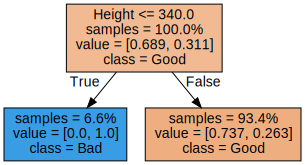

In [21]:
tree = DecisionTreeClassifier(max_depth=1)
# Fit the model
tree.fit(X_train, y_train)
# Visualize the tree
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns, class_names=['Good', 'Bad'], filled=True, impurity=False, proportion=True)
graphviz.Source(dot_data)

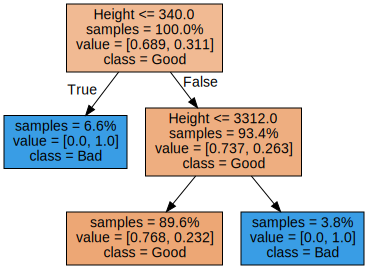

In [22]:
tree = DecisionTreeClassifier(max_depth=2)
# Fit the model
tree.fit(X_train, y_train)
# Visualize the tree
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns, class_names=['Good', 'Bad'], filled=True, impurity=False, proportion=True)
graphviz.Source(dot_data)

In [23]:
def model_analysis(model, train_X, train_y):
  model_probabilities = model.predict_proba(train_X)
  Model_Prediction_Probability = []
  for _ in range(len(train_X)):
      x = max(model_probabilities[_])
      Model_Prediction_Probability.append(x)
  plt.figure(figsize=(15,10)) 
 
  sns.distplot(Model_Prediction_Probability)
  plt.title('Best Model Prediction Probabilities')
  # Set x and y ticks
  plt.xticks(color='gray')
  #plt.xlim(.5,1)
  plt.yticks(color='gray')
  # Create axes object with plt. get current axes
  ax = plt.gca()
  # Set grid lines
  ax.grid(b=True, which='major', axis='y', color='black', alpha=.2)
  # Set facecolor
  ax.set_facecolor('white')
  # Remove box
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.tick_params(color='white')
  plt.show();
  
  model_predictions = model.predict(train_X)
  # Classification Report
  print('\n\n', classification_report(train_y, model_predictions, target_names=['0-Good', '1-Bad']))
  # Confusion Matrix
  con_matrix = pd.DataFrame(confusion_matrix(train_y, model_predictions), columns=['Predicted Good', 'Predicted Bad'], index=['Actual Good', 'Actual Bad'])
  
  plt.figure(figsize=(15,10))
  sns.heatmap(data=con_matrix, cmap='cool');
  plt.title('Model Confusion Matrix')
  plt.show();
  
  return con_matrix


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


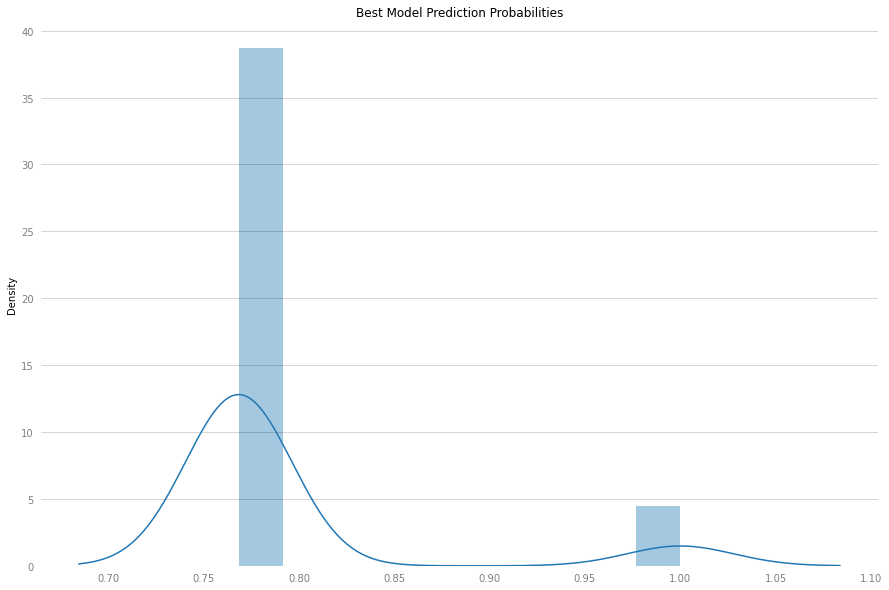



               precision    recall  f1-score   support

      0-Good       0.77      1.00      0.87        73
       1-Bad       1.00      0.33      0.50        33

    accuracy                           0.79       106
   macro avg       0.88      0.67      0.68       106
weighted avg       0.84      0.79      0.75       106



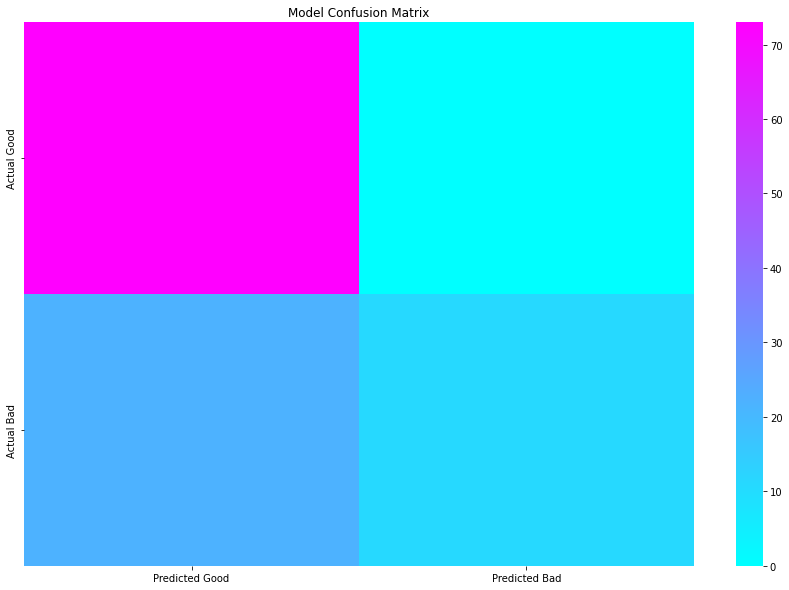

,Predicted Good,Predicted Bad
Actual Good,73,0
Actual Bad,22,11


In [24]:
model_analysis(tree, X_train, y_train)